In [99]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [100]:
# Load the Data LD2011_2014.txt
data = pd.read_csv('./Second_Project/LD2011_2014.txt', sep=';', decimal=',')


In [101]:
# Display the first 5 rows of the data
data.head()

,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
# Set date as index
data['Datetime'] = pd.to_datetime(data['Unnamed: 0'])
data = data.set_index('Datetime')

# Drop the first column
data = data.drop('Unnamed: 0', axis=1)

In [103]:
data.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
Datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
# Show the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0 MB


In [105]:
# Describe the data
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


In [106]:
# Check for missing values
data.isnull().sum()

MT_001    0
MT_002    0
MT_003    0
MT_004    0
MT_005    0
         ..
MT_366    0
MT_367    0
MT_368    0
MT_369    0
MT_370    0
Length: 370, dtype: int64

In [107]:
# Check the count of missing values
data.isnull().sum().sum()

0

In [108]:
# Create one another column with just the year, month, and day called 'Date'
data['date'] = data.index.date

# Put the column after the Datetime column
data = data[['date'] + [col for col in data.columns if col != 'date']]
data.head()

# Ensure that the Date column is in datetime format
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 371 entries, date to MT_370
dtypes: datetime64[ns](1), float64(370)
memory usage: 398.1 MB


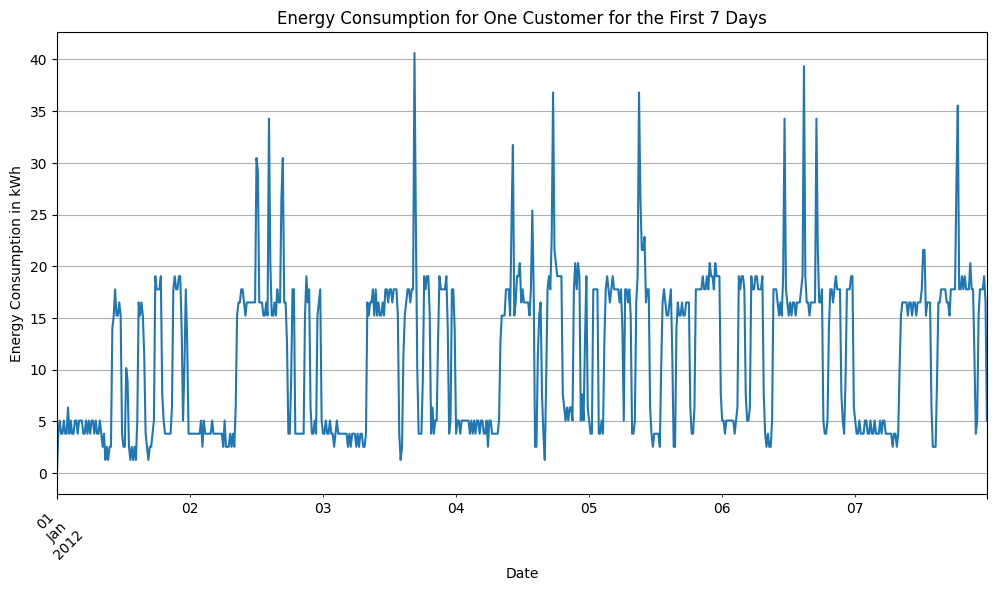

In [122]:
# Plot for the first customer
data['MT_001']['2012-01-01':'2012-01-07'].plot(figsize=(12, 6))
plt.title('Energy Consumption for One Customer for the First 7 Days')
plt.xlabel('Date')
plt.ylabel('Energy Consumption in kWh')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


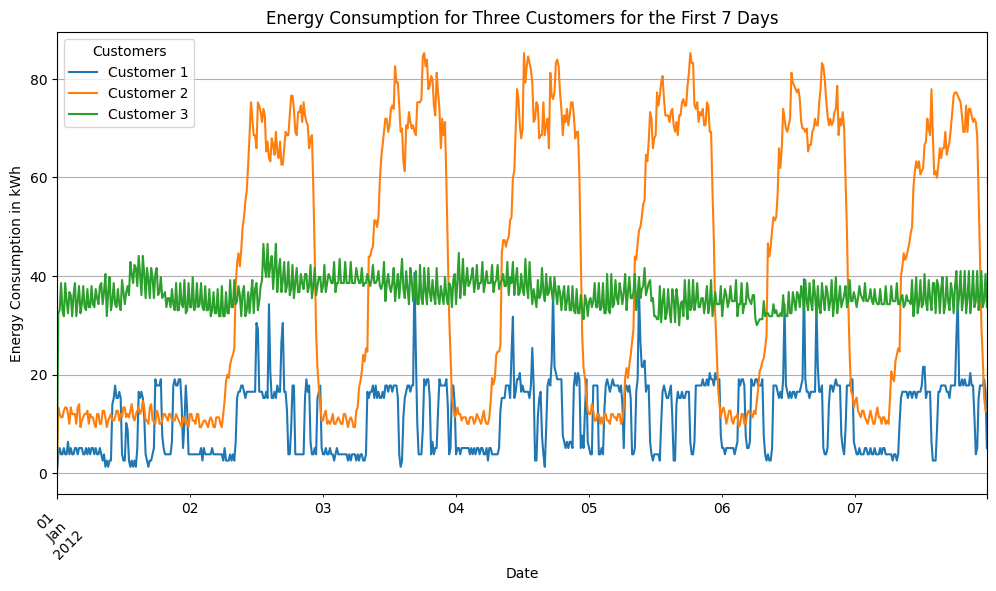

In [123]:
# Plot energy consumption for three users for the specified date range
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for the first customer
data['MT_001']['2012-01-01':'2012-01-07'].plot(ax=ax, label='Customer 1')

# Plot for the second customer
data['MT_100']['2012-01-01':'2012-01-07'].plot(ax=ax, label='Customer 2')

# Plot for the third customer
data['MT_150']['2012-01-01':'2012-01-07'].plot(ax=ax, label='Customer 3')

# Customize the plot
plt.title('Energy Consumption for Three Customers for the First 7 Days')
plt.xlabel('Date')
plt.ylabel('Energy Consumption in kWh')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Customers')
plt.show()


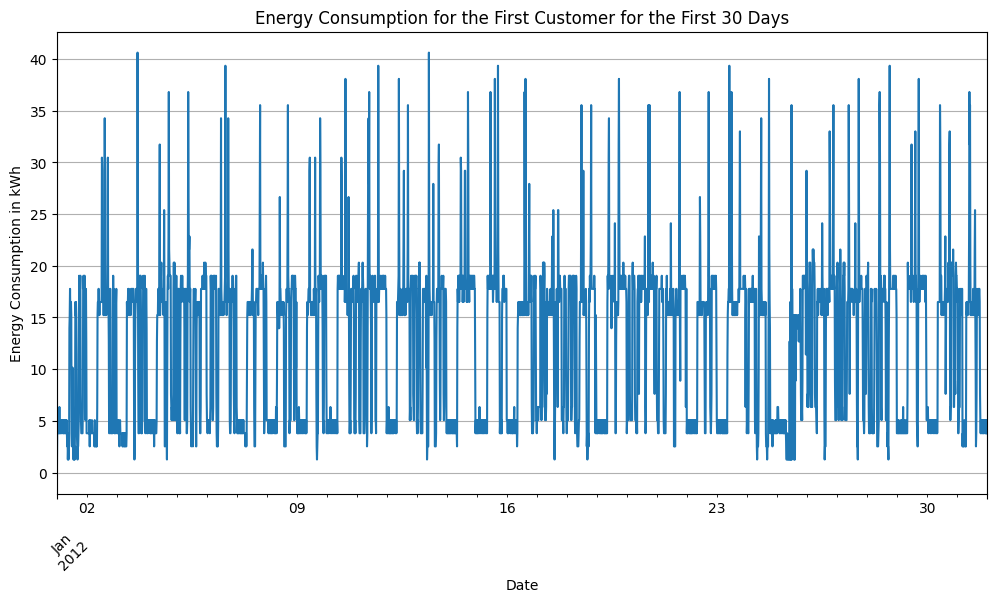

In [110]:
# From the first day where the energy consumption is not 0, plot the energy consumption for the first customer for the first 30 days
data['MT_001']['2012-01-01':'2012-01-31'].plot(figsize=(12, 6))
plt.title('Energy Consumption for the First Customer for the First 30 Days')
plt.xlabel('Date')
plt.ylabel('Energy Consumption in kWh')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

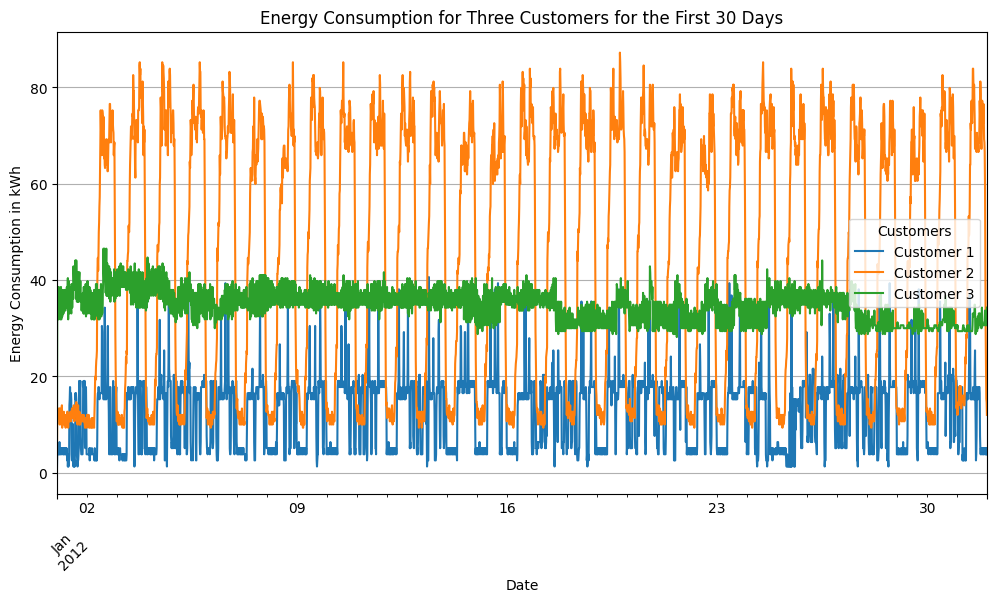

In [124]:
# Plot energy consumption for three users for the specified date range
fig, ax = plt.subplots(figsize=(12, 6))

# Plot for the first customer
data['MT_001']['2012-01-01':'2012-01-31'].plot(ax=ax, label='Customer 1')

# Plot for the second customer
data['MT_100']['2012-01-01':'2012-01-31'].plot(ax=ax, label='Customer 2')

# Plot for the third customer
data['MT_150']['2012-01-01':'2012-01-31'].plot(ax=ax, label='Customer 3')

# Customize the plot
plt.title('Energy Consumption for Three Customers for the First 30 Days')
plt.xlabel('Date')
plt.ylabel('Energy Consumption in kWh')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Customers')
plt.show()
